# Socio-economic data


In [1]:
import pandas as pd
xls = pd.ExcelFile('data/demographics_2015-2019.xlsm')
df2 = pd.read_excel(xls, 'Race')
res = len(xls.sheet_names)
for i in xls.sheet_names:
    print(i)
print(len(xls.sheet_names))

Age
Household Type
Race
Group Quarters Population
Nativity
Geographic Mobility
Educational Attainment
School Enrollment
Means of Commuting
Travel Time to Work
Place of Work
Per Capita Income
Occupation
Industries
Labor Force
Household Income
Family Income
Housing Tenure
Bedrooms
Vacancy Rates
Vehicles per Household
Poverty Rates
Poverty Rates by Age
23


In [2]:
df2.head()

,Race & Ethnicity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,45858,NaN,3478,NaN,9275,NaN,12971,NaN,2976,74558
1,NaN,Total Population,White Alone,%,Black/African-American,%,Hispanic,%,Asian alone,%,Other Races,%
2,United States,324697795,197100373,0.607027,39977554,0.123122,58479370,0.180104,17708954,0.05454,11431544,0.035207
3,Massachusetts,6850553,4903539,0.715787,473181,0.069072,809179,0.118119,449793,0.065658,214861,0.031364
4,Boston,684379,304524,0.444964,155096,0.226623,135757,0.198365,65613,0.095872,23389,0.034176


In [3]:
df2.columns = df2.iloc[1]
df2 = df2.iloc[2:]

In [4]:
df2.head()

1,NaN,Total Population,White Alone,%,Black/African-American,%,Hispanic,%,Asian alone,%,Other Races,%
2,United States,324697795,197100373,0.607027,39977554,0.123122,58479370,0.180104,17708954,0.05454,11431544,0.035207
3,Massachusetts,6850553,4903539,0.715787,473181,0.069072,809179,0.118119,449793,0.065658,214861,0.031364
4,Boston,684379,304524,0.444964,155096,0.226623,135757,0.198365,65613,0.095872,23389,0.034176
5,Allston,19261,9839,0.510825,1099,0.057058,2586,0.134261,4811,0.249779,926,0.048076
6,Back Bay,17783,13044,0.73351,761,0.042794,1715,0.09644,1917,0.1078,346,0.019457


In [5]:
# df2 = df2.loc[:, ~df2.columns.astype(str).str.contains('%')]
df2 = df2.rename(columns={df2.columns[0]: 'Neighborhood'})


capital = pd.read_csv("../data/fy24-capital-budget-plan-recommended.csv")
capital = capital.drop_duplicates()
capital.fillna(0, inplace=True)
capital['Total_Project_Budget'] = pd.to_numeric(capital['Total_Project_Budget'], errors='coerce')
# Handling any new missing values after conversion
capital['Total_Project_Budget'].fillna(capital['Total_Project_Budget'].median(), inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#encoding categories into numericla values
#df['Department'] = le.fit_transform(df['Department'])

#for text data processing, if needed, for example, making all text lowercase, removing punctuation, etc.
capital['Scope_Of_Work'] = capital['Scope_Of_Work'].str.lower().str.replace('[^\w\s]', '')

# Further steps such as handling outliers, feature engineering, etc., can be added as needed.

# Check the DataFrame after cleaning
print(capital.head())


capital.head()

                              Department  \
0  Boston Centers for Youth and Families   
1  Boston Centers for Youth and Families   
2  Boston Centers for Youth and Families   
3  Boston Centers for Youth and Families   
4  Boston Centers for Youth and Families   

                                 Project_Name  \
0       BCYF Security and Technology Upgrades   
1  BCYF Tobin Community Center Retaining Wall   
2             BCYF North End Community Center   
3                                Pool Repairs   
4                        Youth Budget Round 4   

                                       Scope_Of_Work  \
0  improvements to technology infrastructure and ...   
1  repair or replace the retaining wall adjacent ...   
2  develop a design for a new north end community...   
3  renovate and upgrade locker rooms and pools in...   
4  engage youth across the city to create a capit...   

                           PM_Department           Project_Status  \
0  Boston Centers for Youth and Fa

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000.0
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000.0
2,Boston Centers for Youth and Families,BCYF North End Community Center,develop a design for a new north end community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000.0
3,Boston Centers for Youth and Families,Pool Repairs,renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000.0
4,Boston Centers for Youth and Families,Youth Budget Round 4,engage youth across the city to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000.0


In [6]:

# capital = capital.groupby('Neighborhood')['Total_Project_Budget'].sum()
capital = capital[['Neighborhood', 'Total_Project_Budget']]
capital = capital.groupby('Neighborhood')['Total_Project_Budget'].sum().reset_index()
capital = capital.merge(df2, on='Neighborhood')

capital.head()

,Neighborhood,Total_Project_Budget,Total Population,White Alone,%,Black/African-American,%,Hispanic,%,Asian alone,%,Other Races,%
0,Back Bay,65442299.0,17783,13044,0.73351,761,0.042794,1715,0.09644,1917,0.1078,346,0.019457
1,Beacon Hill,34410000.0,9648,8074,0.836857,138,0.014303,580,0.060116,578,0.059909,278,0.028814
2,Charlestown,531212390.0,19890,14692,0.738663,1019,0.051232,2198,0.110508,1613,0.081096,368,0.018502
3,Dorchester,239411239.0,126909,28244,0.222553,55787,0.439583,25288,0.199261,12540,0.098811,5050,0.039792
4,East Boston,62457890.0,47263,16011,0.338764,1171,0.024776,26707,0.565072,2167,0.04585,1207,0.025538


In [9]:
new_column_name, column_index_to_rename = 'White %', 4
capital.columns.values[column_index_to_rename] = new_column_name
new_column_name, column_index_to_rename = 'Black %', 6
capital.columns.values[column_index_to_rename] = new_column_name
new_column_name, column_index_to_rename = 'Hispanic %', 8
capital.columns.values[column_index_to_rename] = new_column_name
new_column_name, column_index_to_rename = 'Asian %', 10
capital.columns.values[column_index_to_rename] = new_column_name
new_column_name, column_index_to_rename = 'Other %', 12
capital.columns.values[column_index_to_rename] = new_column_name
capital['Budget_per_Capita'] = capital['Total_Project_Budget'] / capital['Total Population']

# List of columns to keep
columns_to_keep = ['Neighborhood', 'Budget_per_Capita'] + [col for col in capital.columns if '%' in col]

# Keep only the specified columns
capital2 = capital[columns_to_keep]

# save to a new csv file
capital2.to_csv('nhood_race_budget.csv', index=False)

capital2.head()

,Neighborhood,Budget_per_Capita,White %,Black %,Hispanic %,Asian %,Other %
0,Back Bay,3680.048305,0.73351,0.042794,0.09644,0.1078,0.019457
1,Beacon Hill,3566.542289,0.836857,0.014303,0.060116,0.059909,0.028814
2,Charlestown,26707.510809,0.738663,0.051232,0.110508,0.081096,0.018502
3,Dorchester,1886.479596,0.222553,0.439583,0.199261,0.098811,0.039792
4,East Boston,1321.496519,0.338764,0.024776,0.565072,0.04585,0.025538


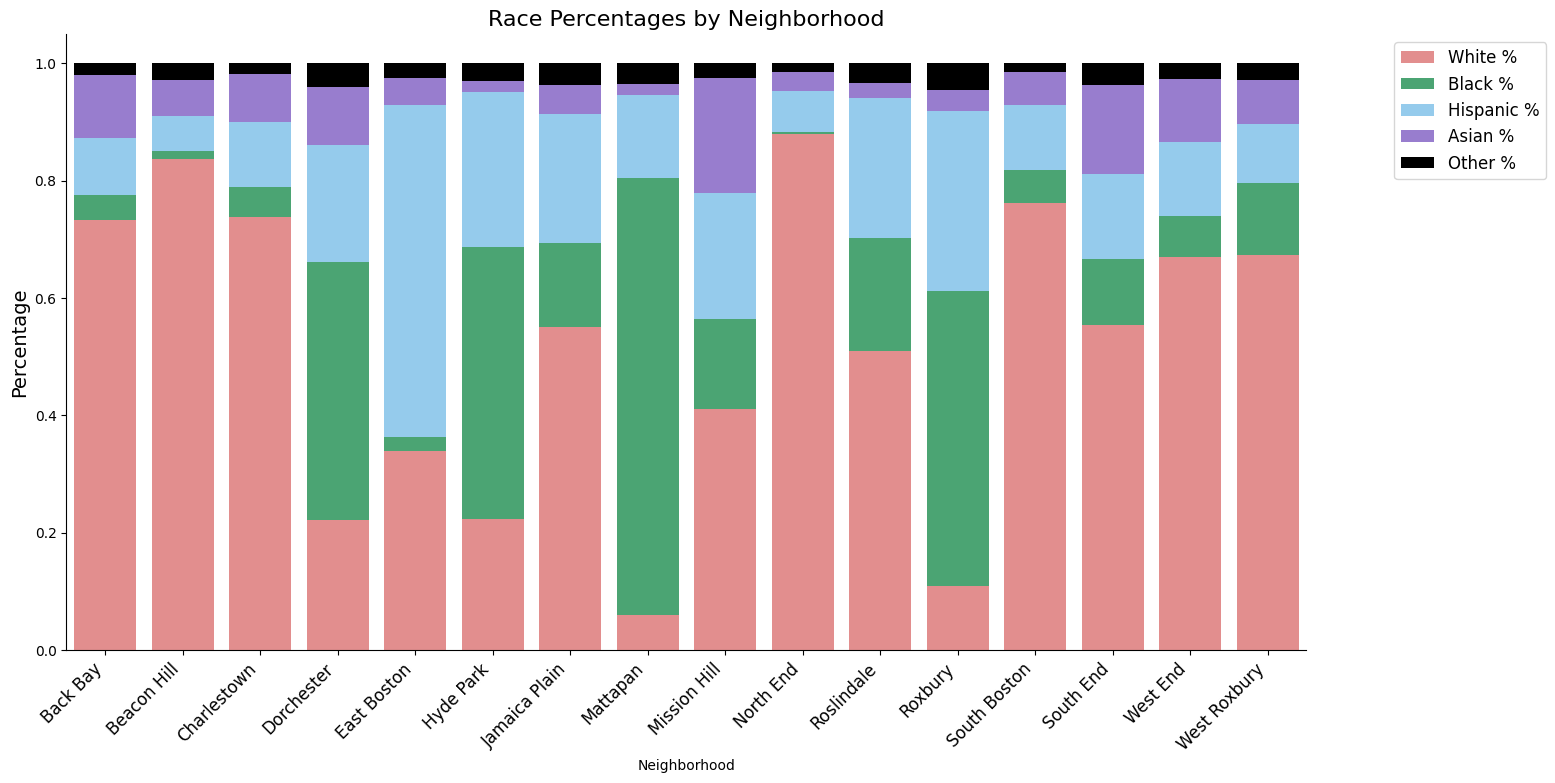

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette for a more aesthetic look
colors = ['lightcoral', 'mediumseagreen', 'lightskyblue', 'mediumpurple', 'black']

# Assuming your dataframe is named 'capital2'
plt.figure(figsize=(16, 8))

# Bar plots for race percentages with improved aesthetics
sns.barplot(x='Neighborhood', y='White %', data=capital2, color=colors[0], label='White %')
sns.barplot(x='Neighborhood', y='Black %', data=capital2, color=colors[1], label='Black %', bottom=capital2['White %'])
sns.barplot(x='Neighborhood', y='Hispanic %', data=capital2, color=colors[2], label='Hispanic %', bottom=capital2['White %'] + capital2['Black %'])
sns.barplot(x='Neighborhood', y='Asian %', data=capital2, color=colors[3], label='Asian %', bottom=capital2['White %'] + capital2['Black %'] + capital2['Hispanic %'])
sns.barplot(x='Neighborhood', y='Other %', data=capital2, color=colors[4], label='Other %', bottom=capital2['White %'] + capital2['Black %'] + capital2['Hispanic %'] + capital2['Asian %'])

# Set labels and title with updated font size
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Race Percentages by Neighborhood', fontsize=16)

# Add legend with updated font size
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)

# Remove top and right spines for cleaner look
sns.despine()

plt.show()


In [11]:
poverty = pd.read_excel(xls, 'Poverty Rates')
poverty.columns = poverty.iloc[1]
poverty = poverty.iloc[2:]
poverty = poverty.rename(columns={poverty.columns[0]: 'Neighborhood'})
poverty.head()

1,Neighborhood,Total population for whom poverty status is determined,Total in poverty,Poverty rate,Percent of Boston's impoverished
2,United States,316715051,42510843,0.134224,0
3,Massachusetts,6615375,680962,0.102936,0
4,Boston,641654,121364,0.189142,0
5,Allston,14019,3915,0.279264,0.032258
6,Back Bay,16263,1941,0.119351,0.015993


In [12]:
capital = capital.merge(poverty, on='Neighborhood')
capital.head()

,Neighborhood,Total_Project_Budget,Total Population,White Alone,White %,Black/African-American,Black %,Hispanic,Hispanic %,Asian alone,Asian %,Other Races,Other %,Budget_per_Capita,Total population for whom poverty status is determined,Total in poverty,Poverty rate,Percent of Boston's impoverished
0,Back Bay,65442299.0,17783,13044,0.73351,761,0.042794,1715,0.09644,1917,0.1078,346,0.019457,3680.048305,16263,1941,0.119351,0.015993
1,Beacon Hill,34410000.0,9648,8074,0.836857,138,0.014303,580,0.060116,578,0.059909,278,0.028814,3566.542289,9635,614,0.063726,0.005059
2,Charlestown,531212390.0,19890,14692,0.738663,1019,0.051232,2198,0.110508,1613,0.081096,368,0.018502,26707.510809,19800,2859,0.144394,0.023557
3,Dorchester,239411239.0,126909,28244,0.222553,55787,0.439583,25288,0.199261,12540,0.098811,5050,0.039792,1886.479596,126173,28033,0.222179,0.230983
4,East Boston,62457890.0,47263,16011,0.338764,1171,0.024776,26707,0.565072,2167,0.04585,1207,0.025538,1321.496519,47038,7548,0.160466,0.062193


In [23]:
temp = capital[['Neighborhood', 'Total_Project_Budget']]
temp = temp.merge(poverty, on='Neighborhood')
temp = temp[['Neighborhood', 'Total_Project_Budget', 'Poverty rate']]
temp.to_csv('nhood_poverty_rate.csv', index=False)
temp

,Neighborhood,Total_Project_Budget,Poverty rate
0,Back Bay,65442299.0,0.119351
1,Beacon Hill,34410000.0,0.063726
2,Charlestown,531212390.0,0.144394
3,Dorchester,239411239.0,0.222179
4,East Boston,62457890.0,0.160466
5,Hyde Park,6615000.0,0.149196
6,Jamaica Plain,80782500.0,0.128023
7,Mattapan,87935000.0,0.201043
8,Mission Hill,5242212.0,0.370441
9,North End,95445000.0,0.080382


In [24]:
hhIncome = pd.read_excel(xls, 'Household Income')
hhIncome.columns = hhIncome.iloc[1]
hhIncome = hhIncome.iloc[2:]
hhIncome = hhIncome.rename(columns={hhIncome.columns[0]: 'Neighborhood'})
hhIncome.head()

1,Neighborhood,Median Income,Total Households,"$14,999 and under",%,"$15,000 to $24,999",%,"$25,000 to $34,999",%,"$35,000 to $49,999",%,"$50,000 to $74,999",%,"$75,000 to $99,999",%,"$100,000 to $149,999",%,"$150,000 +",%
2,United States,62843,120756048,12492454,0.103,10760144,0.089,10792134,0.089,14822045,0.123,20789890,0.172,15374617,0.127,18286811,0.151,17437953,0.144
3,Massachusetts,81215,2617497,246932,0.094,187642,0.072,175126,0.067,242760,0.093,371113,0.142,315954,0.121,466142,0.178,611828,0.234
4,Boston,71259,269522,43310,0.161,21877,0.081,16916,0.063,22568,0.084,35104,0.13,27651,0.103,42245,0.157,59851,0.222
5,Allston,58141,6526,1140,0.175,491,0.075,551,0.084,700,0.107,1129,0.173,639,0.098,1054,0.162,822,0.126
6,Back Bay,111185,9829,1324,0.135,433,0.044,422,0.043,596,0.061,959,0.098,802,0.082,1393,0.142,3900,0.397


In [14]:
capital = capital.merge(hhIncome, on='Neighborhood')
capital.head()

,Neighborhood,Total_Project_Budget,Total Population,White Alone,White %,Black/African-American,Black %,Hispanic,Hispanic %,Asian alone,...,"$35,000 to $49,999",%,"$50,000 to $74,999",%,"$75,000 to $99,999",%,"$100,000 to $149,999",%,"$150,000 +",%
0,Back Bay,65442299.0,17783,13044,0.73351,761,0.042794,1715,0.09644,1917,...,596,0.061,959,0.098,802,0.082,1393,0.142,3900,0.397
1,Beacon Hill,34410000.0,9648,8074,0.836857,138,0.014303,580,0.060116,578,...,345,0.064,683,0.126,720,0.133,891,0.164,2061,0.38
2,Charlestown,531212390.0,19890,14692,0.738663,1019,0.051232,2198,0.110508,1613,...,445,0.049,643,0.07,678,0.074,1523,0.166,3771,0.412
3,Dorchester,239411239.0,126909,28244,0.222553,55787,0.439583,25288,0.199261,12540,...,4581,0.103,6121,0.138,4776,0.108,6324,0.143,6299,0.142
4,East Boston,62457890.0,47263,16011,0.338764,1171,0.024776,26707,0.565072,2167,...,2257,0.136,2907,0.175,1881,0.114,2488,0.15,2480,0.15


In [25]:
temp = capital[['Neighborhood', 'Total_Project_Budget']]
temp = temp.merge(hhIncome, on='Neighborhood')
temp = temp[['Neighborhood', 'Total_Project_Budget', 'Median Income']]
temp.to_csv('nhood_median_income.csv', index=False)
temp

,Neighborhood,Total_Project_Budget,Median Income
0,Back Bay,65442299.0,111185
1,Beacon Hill,34410000.0,110840.9
2,Charlestown,531212390.0,127399.6
3,Dorchester,239411239.0,55009.1
4,East Boston,62457890.0,60510.4
5,Hyde Park,6615000.0,72953.1
6,Jamaica Plain,80782500.0,97068.8
7,Mattapan,87935000.0,55968.4
8,Mission Hill,5242212.0,42803
9,North End,95445000.0,103998.6


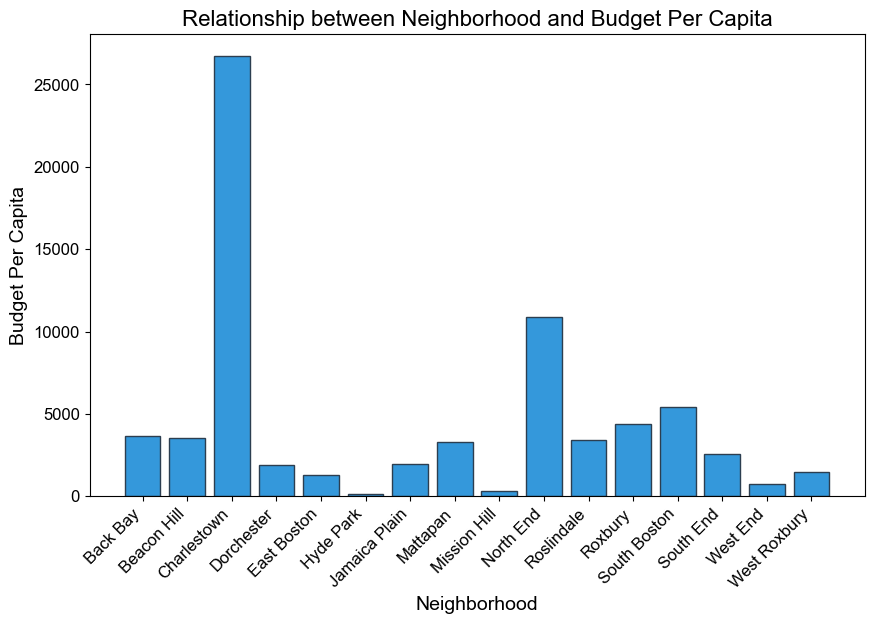

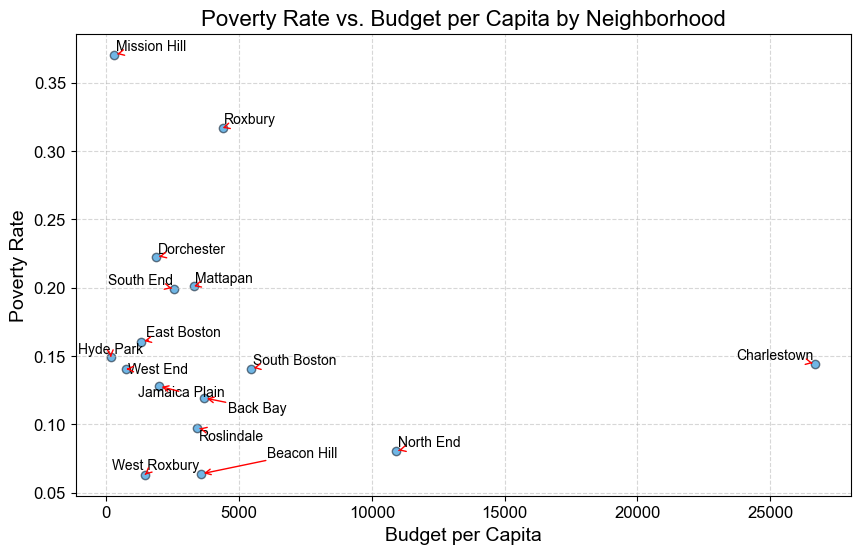

In [16]:
import matplotlib.pyplot as plt

# Set custom font styles
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

neighborhood_column = 'Neighborhood'
budget_per_capita_column = 'Budget_per_Capita'

# Plotting a bar plot with improved aesthetics
plt.figure(figsize=(10, 6))
plt.bar(capital[neighborhood_column], capital[budget_per_capita_column], color='#3498db', edgecolor='#2c3e50')
plt.title('Relationship between Neighborhood and Budget Per Capita', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Budget Per Capita', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

from adjustText import adjust_text

# Set custom font styles
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Scatter plot with improved aesthetics and grid lines
plt.figure(figsize=(10, 6))
scatter = plt.scatter(capital['Budget_per_Capita'], capital['Poverty rate'], color='#3498db', alpha=0.7, edgecolor='#2c3e50')

# Adding labels and title with updated font styles
plt.title('Poverty Rate vs. Budget per Capita by Neighborhood', fontsize=16)
plt.xlabel('Budget per Capita', fontsize=14)
plt.ylabel('Poverty Rate', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adding neighborhood names as annotations with adjust_text
texts = [plt.text(x, y, text, fontsize=10) for x, y, text in zip(capital['Budget_per_Capita'], capital['Poverty rate'], capital['Neighborhood'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Display the plot
plt.show()




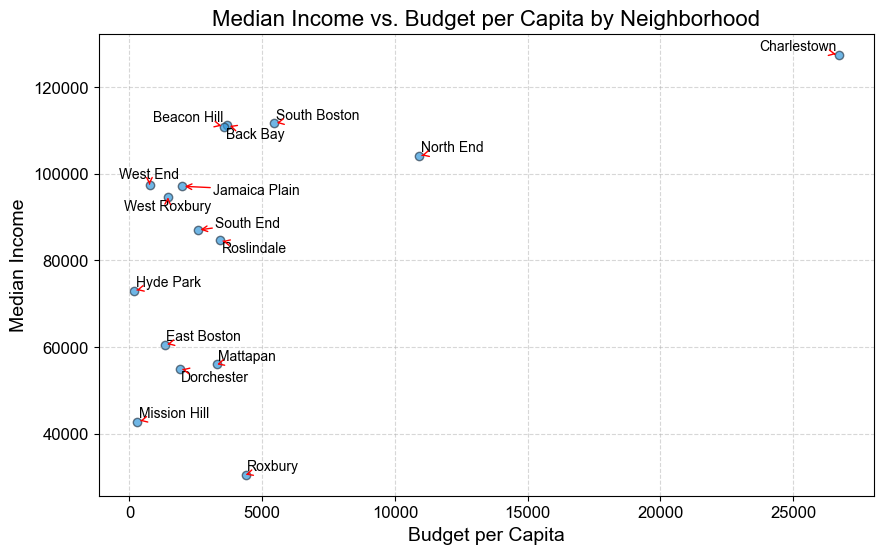

In [17]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Set custom font styles
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Scatter plot with improved aesthetics
plt.figure(figsize=(10, 6))
scatter = plt.scatter(capital['Budget_per_Capita'], capital['Median Income'], marker='o', color='#3498db', edgecolor='#2c3e50', alpha=0.7)

# Adding labels and title with updated font styles
plt.title('Median Income vs. Budget per Capita by Neighborhood', fontsize=16)
plt.xlabel('Budget per Capita', fontsize=14)
plt.ylabel('Median Income', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adding neighborhood names as annotations with adjust_text
texts = [plt.text(x, y, text, ha='right', va='bottom', fontsize=10) for x, y, text in zip(capital['Budget_per_Capita'], capital['Median Income'], capital['Neighborhood'])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Display the plot
plt.show()


In [18]:
# List of neighborhoods
neighborhoods = ['Dorchester', 'Hyde Park', 'Mattapan', 'Roxbury']

# Find the mean Budget_per_Capita for the specified neighborhoods
mean_budget_specified = capital[capital['Neighborhood'].isin(neighborhoods)]['Budget_per_Capita'].mean()

# Find the mean Budget_per_Capita for the other neighborhoods
mean_budget_other = capital[~capital['Neighborhood'].isin(neighborhoods)]['Budget_per_Capita'].mean()

print(mean_budget_specified)
print(mean_budget_other)

2434.118031306087
5174.4621274667825


When correlated with budgeting data, this data can provide insights into how resources are distributed among different demographic groups. There are 23 sheets in this excel spreadsheet file. Included within it is data on different demographics such as race, age, school enrollment, etc. An example of how we can use this in the socio-economic extension is to see if certain neighborhoods with higher populations of a demographic are receiving more funding, or if areas with lower/higher household income are receiving more funding. 

# Economic Data - Affordable Housing

In [269]:
df = pd.read_csv("data/income-restricted-housing-inventory-2022.csv")

In [270]:
df.head()

,Project_Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


In [271]:
df = df.groupby('Neighborhood')['Total Income-Restricted'].sum()

In [272]:
df.head()

Neighborhood
Allston             931
Allston/Brighton     61
Back Bay            681
Bay Village          40
Beacon Hill         343
Name: Total Income-Restricted, dtype: int64

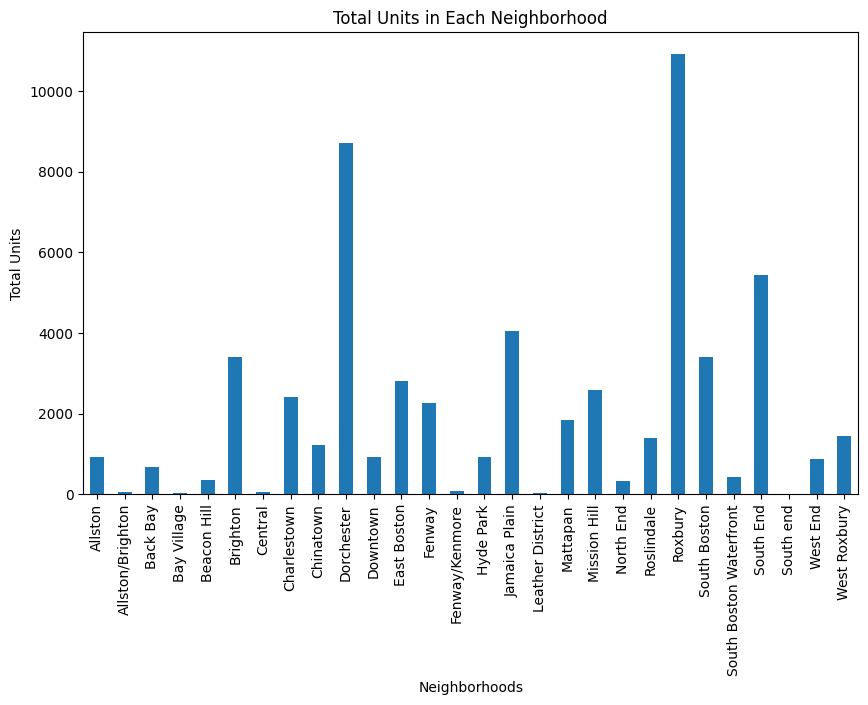

In [273]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='Neighborhoods', y='Total Units', figsize=(10, 6))

plt.title('Total Units in Each Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Units')

plt.show()


In the graphs and data presented above, it's evident that specific neighborhoods are allocated more affordable housing. It's important to note that this data is from 2022. By delving into previous years' data, we can uncover trends—whether there's been an increase or decrease in affordable housing within certain neighborhoods over the years. Linking this analysis to our budget assessment, we can ascertain whether neighborhoods with a higher prevalence of affordable housing receive a proportionate allocation of the city's budget for various needs.

# Weather Data

In [274]:
import requests
request1 = 'https://api.weather.gov/points/71.07433319091797,42.360478319401096'
response = requests.get('https://api.weather.gov/points/39.7456,-97.0892')

# Check the status code of the response
if response.status_code == 200:
    print('Request was successful.')
    # Parse the response as JSON
    data = response.json()
else:
    print(f'Request failed with status code {response.status_code}')

Request was successful.


In [275]:
data

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/39.7456,-97.0892',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-97.0892, 39.7456]},
 'properties': {'@id': 'https://api.weather.gov/p

# Individual Departments

In [276]:
# df = pd.read_csv("data/checkbook_explorerfy21.csv")

# I tried 2022 and 2021 but it gives an encoding error
df = pd.read_csv("data/checkbook-explorer-fy16.csv")

C:\Users\BF\AppData\Local\Temp\ipykernel_25056\3845804370.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/checkbook-explorer-fy16.csv")


In [277]:
df.head()

,voucher,voucher_line,distribution_line,entered,month_number,fiscal_month,month,fiscal_year,year,vendor_name,account,account_descr,dept,dept_name,c6_digit_org_name,monetary_amount
0,2168567,1,1,7/1/2015,7,1,July,2016,2015,"McGovern, Susan",52907,Cont Serv Other,303100,Environment Department,Environment,1017.00
1,2168864,1,1,7/2/2015,7,1,July,2016,2015,Shred-It US JV LLC,52907,Cont Serv Other,221300,Fire Department,Fire Alarm,60.00
2,2172634,1,1,7/2/2015,7,1,July,2016,2015,"Grimes Oil Co., Inc.",52207,Utilities Heating Oil,400100,Cemetery Division,Cemetery,202.30
3,2174043,1,1,7/7/2015,7,1,July,2016,2015,Zoll Medical Corp.,55911,Equipment Other,221203,Fire Department,Technical Rescue,4309.50
4,2174663,17,1,7/9/2015,7,1,July,2016,2015,"Sprint Solutions, Inc.",52109,Equipment,136100,Assessing Department,Operations,959.76


In [278]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print(f"{column_name}: {unique_count}")

voucher: 76249
voucher_line: 193
distribution_line: 50
entered: 246
month_number: 12
fiscal_month: 12
month: 12
fiscal_year: 1
year: 2
vendor_name: 5635
account: 163
account_descr: 163
dept: 450
dept_name: 66
c6_digit_org_name: 439
monetary_amount: 45455


In [279]:
df = df.groupby('dept_name')['monetary_amount'].sum()

In [280]:
df.head()

dept_name
Administration & Finance          5.379000e+03
Assessing Department              7.287108e+05
Auditing Department               3.737361e+05
Boston Center-Youth & Families    6.363942e+06
Boston Public School Dept         2.970017e+08
Name: monetary_amount, dtype: float64

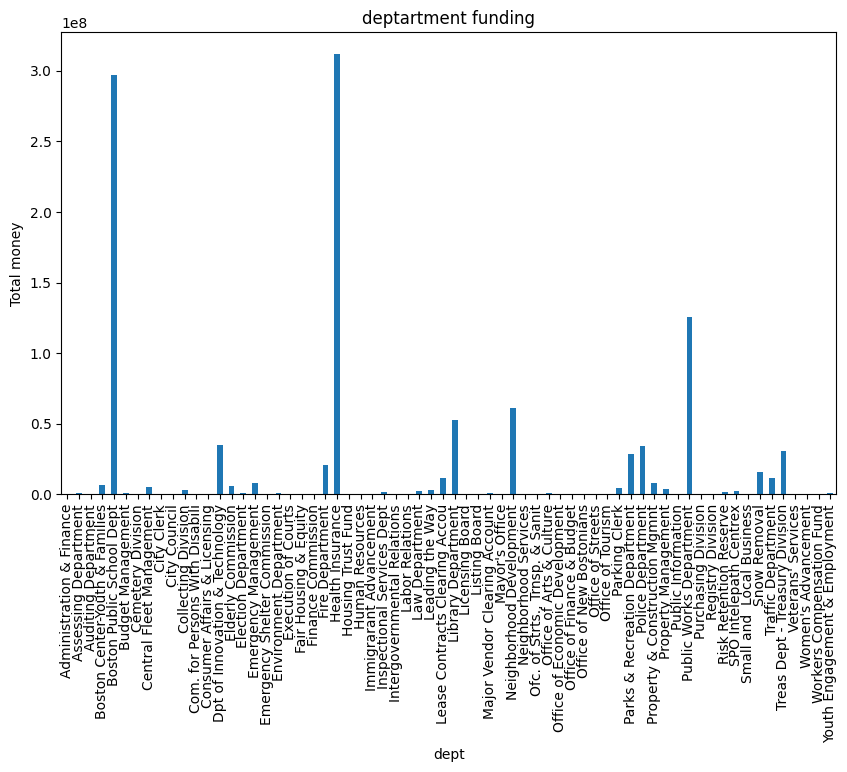

In [281]:
df.plot(kind='bar', x='dept_name', y='Total Units', figsize=(10, 6))

plt.title('deptartment funding')
plt.xlabel('dept')
plt.ylabel('Total money')

plt.show()

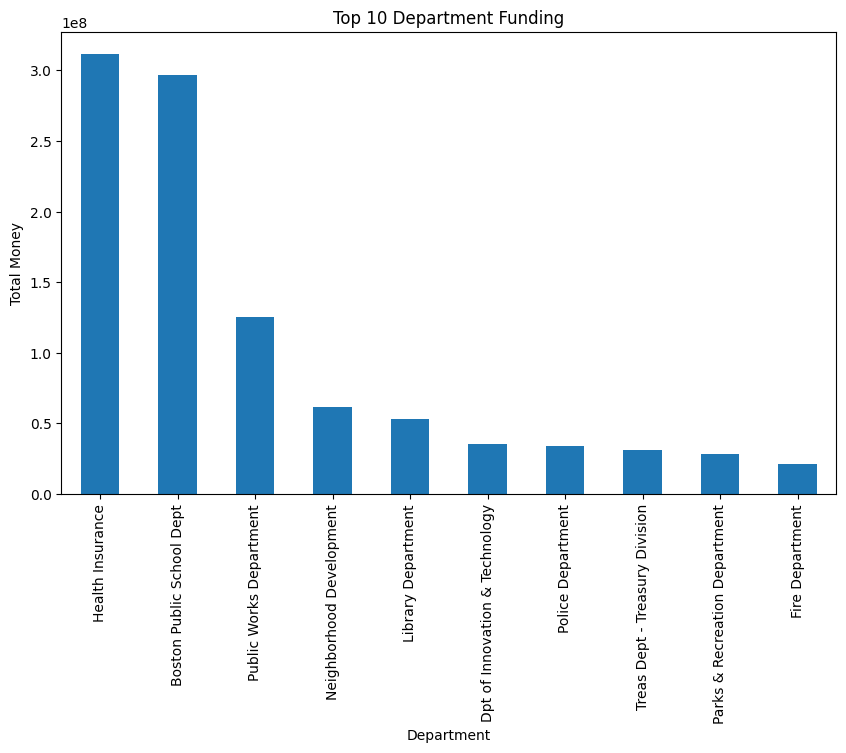

In [282]:
top_10 = df.nlargest(10)

top_10.plot(kind='bar', figsize=(10, 6))

plt.title('Top 10 Department Funding')
plt.xlabel('Department')
plt.ylabel('Total Money')

plt.show()

We can analyze where the money is being spent in health insurance and bps deptartment since those are where most of the money is being spent. We can look at the account_name and vendor_descr columns to further investigate where this money is being spent. The csv files for 2022 and 2021 were giving errors so I used 2016 here bc that was what worked. 